In [1]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


1. Understanding the Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
X=np.array(x)
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

2. Performing Elbow Method to find the Optimal Number of Clusters


In [7]:
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
#Elbow Method(Used when we are not aware what is the optimal clusters number)
for i in range(1,11): #Using range function to find the elbow
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) #k-means++ algo is a smart way to initialize centroids with improved quality of clusters
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) #kmeans.inertia_ is a formula used to segregate the datapoints in the dataset into clusters

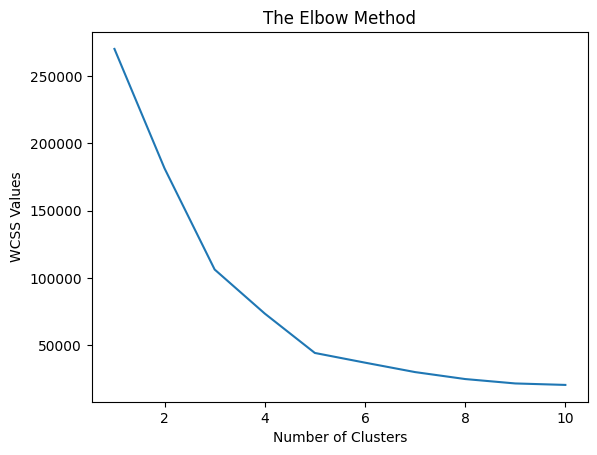

In [10]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Values")
plt.show()

3. Training a Model using Unsupervised Learning Algorithm (KMeans)

In [18]:
#In above graph we got optimal number of cluster at 5 (i.e the elbow was formed at 5)
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)


In [19]:
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


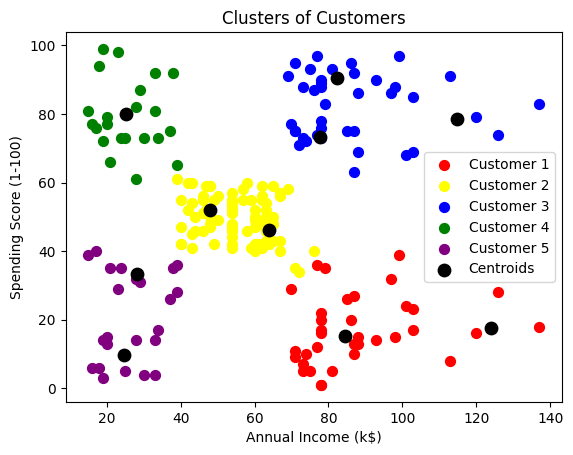

In [20]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=50,c='red',label="Customer 1") # X is our data  and the 2 matrices y_kmeans represents the output clusters and s is size of cluster(Customizable)
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=50,c='yellow',label="Customer 2")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=50,c='blue',label="Customer 3")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s=50,c='green',label="Customer 4")
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1],s=50,c='purple',label="Customer 5")

#Plotting Centroids to make it more informative
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=80,c='black',label='Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In above Scatter graph it can be seen that the targeted customers by any retail store would be the customer 2 having yellow clusters as the clusters here are very closely scattered to each other and have approximate average Annual Income and Spending Score